## Mini Project 3: Recommendation Engine using Collaborative Filtering

A __recommender system__ is a subclass of information filtering system that seeks to predict the “rating” or “preference” a user would give to an item. 

Recommender systems are utilized in a variety of areas including:
1. movies
2. music
3. news
4. books
5. research articles
6. search queries
7. social tags
8. product

There are 3 types of Recommendation Engines:
1. Collaborative filtering<br/>
&nbsp; &nbsp;User-based filtering<br/>
&nbsp; &nbsp;Item-based filtering
2. Content-based filtering
3. Hybrid recommender system

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython import display

In [2]:
data = pd.read_csv('jester_ratings.csv')

In [3]:
data.head()

,userId,jokeId,rating
0,1,5,0
1,1,7,-9
2,1,8,-9
3,1,13,-7
4,1,15,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   userId  1048575 non-null  int64
 1   jokeId  1048575 non-null  int64
 2   rating  1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [5]:
data.rating.value_counts()

 2     85467
 3     81958
 4     76616
 1     74658
 5     69898
 0     62969
 6     62583
 7     57756
 9     52988
 8     49262
 10    45387
-1     40637
-2     40163
-3     39709
-4     37624
-5     34404
-6     32046
-7     29544
-9     28351
-10    24700
-8     21855
Name: rating, dtype: int64

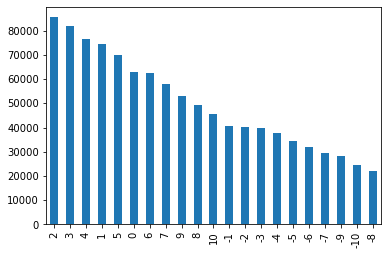

In [6]:
data.rating.value_counts().plot(kind='bar')
plt.show()

In [7]:
data.isnull().sum()

userId    0
jokeId    0
rating    0
dtype: int64

## Data Processing

In [8]:
from surprise import Reader, Dataset
reader = Reader(rating_scale = (-10, 10))
df = Dataset.load_from_df(data[['userId','jokeId','rating']], reader)

In [ ]:
# pip install surprise

In [9]:
from surprise.model_selection import train_test_split

trainset, testset = train_test_split(df, test_size=0.25)

## Model Training

In [10]:
from surprise import SVD, accuracy
from surprise.model_selection import cross_validate
algo = SVD(n_epochs = 50, n_factors = 200, verbose = True)
algo.fit(trainset)
cross_validate(algo, df, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

In [11]:
predictions = algo.test(testset)

In [12]:
predictions

[Prediction(uid=23678, iid=149, r_ui=-2.0, est=-0.2193561173332932, details={'was_impossible': False}),
 Prediction(uid=5822, iid=89, r_ui=2.0, est=2.044799616900728, details={'was_impossible': False}),
 Prediction(uid=22232, iid=115, r_ui=7.0, est=6.7451043844820155, details={'was_impossible': False}),
 Prediction(uid=208, iid=130, r_ui=-3.0, est=-2.84267163719214, details={'was_impossible': False}),
 Prediction(uid=27917, iid=8, r_ui=-3.0, est=-2.98556901601329, details={'was_impossible': False}),
 Prediction(uid=13633, iid=39, r_ui=10.0, est=9.872706455988068, details={'was_impossible': False}),
 Prediction(uid=13601, iid=130, r_ui=4.0, est=3.8440853492232607, details={'was_impossible': False}),
 Prediction(uid=27512, iid=17, r_ui=-3.0, est=-3.283540291208791, details={'was_impossible': False}),
 Prediction(uid=17980, iid=96, r_ui=0.0, est=1.852292761185264, details={'was_impossible': False}),
 Prediction(uid=1949, iid=17, r_ui=-6.0, est=-5.3431071431972486, details={'was_impossible

## Model Evaluation

In [13]:
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 1.8795


1.8795133462636084

## Model Deployment

In [14]:
testset[0]

(23678, 149, -2.0)

In [15]:
recommendations = [pred for pred in predictions if pred[0] == 33681]

In [16]:
recommendations

[Prediction(uid=33681, iid=18, r_ui=8.0, est=7.620212612525298, details={'was_impossible': False}),
 Prediction(uid=33681, iid=23, r_ui=4.0, est=4.250885382227789, details={'was_impossible': False}),
 Prediction(uid=33681, iid=55, r_ui=3.0, est=3.197090870020808, details={'was_impossible': False}),
 Prediction(uid=33681, iid=16, r_ui=-9.0, est=-8.249182192012697, details={'was_impossible': False}),
 Prediction(uid=33681, iid=135, r_ui=10.0, est=9.75208885955065, details={'was_impossible': False}),
 Prediction(uid=33681, iid=40, r_ui=2.0, est=2.2383597797169186, details={'was_impossible': False}),
 Prediction(uid=33681, iid=122, r_ui=9.0, est=8.906154137408219, details={'was_impossible': False}),
 Prediction(uid=33681, iid=110, r_ui=9.0, est=8.785178313161087, details={'was_impossible': False}),
 Prediction(uid=33681, iid=69, r_ui=10.0, est=6.742556841237729, details={'was_impossible': False}),
 Prediction(uid=33681, iid=91, r_ui=9.0, est=8.80484944583975, details={'was_impossible': Fal

In [17]:
## How to check if our results make sense? Check if the genre is the same as input.
uid = 25
jid = 6
predicted_rating = algo.predict(str(uid), str(jid))

In [18]:
predicted_rating

Prediction(uid='25', iid='6', r_ui=None, est=1.5387370955820996, details={'was_impossible': False})

In [19]:
from collections import defaultdict

def get_all_predictions(predictions):
    
    # First map the predictions to each user.
    top_n = defaultdict(list)    
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    # Then sort the predictions for each user
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
    return top_n

all_pred = get_all_predictions(predictions)

In [20]:
new_all_pred=dict(filter(lambda elem: len(elem[1]) != 1, all_pred.items()))

In [21]:
n = 2
for uid, user_ratings in new_all_pred.items():
    user_ratings.sort(key=lambda x: x[1], reverse=True)
    new_all_pred[uid] = user_ratings[:n]
    
tmp = pd.DataFrame.from_dict(new_all_pred)
tmp_transpose = tmp.transpose()

In [22]:
tmp_transpose

,0,1
23678,"(60, 9.768484915144093)","(21, 9.547536012596407)"
5822,"(67, 4.960123928968235)","(47, 4.843034296432339)"
22232,"(120, 8.816277387705828)","(132, 8.660619560510526)"
208,"(23, 7.743427344100455)","(16, 7.4038792814275665)"
27917,"(7, 0.646084240370107)","(8, -2.98556901601329)"
...,...,...
6605,"(8, 2.7635888692624055)","(142, 1.524822288859943)"
9291,"(16, 4.949843097189729)","(18, 2.525835985614212)"
7534,"(32, 2.1339069314898866)","(54, -2.719680283287127)"
10763,"(121, 1.2718866996716762)","(13, -2.23691951731987)"


In [23]:
# Make Top 4 recommendations based on user id.
# Question: What jokes does user_id = 123 like?

def get_predictions(uid):
    results = tmp_transpose.loc[uid]
    return results

uid=25
results = get_predictions(uid)
results

# def get_predictions(user_id):
#     results = tmp_transpose.loc[user_id]
#     return results

# user_id = 'U1073'
# results = get_predictions(user_id)
# results

0    (116, 8.771023393462919)
1     (48, 8.359938117836078)
Name: 25, dtype: object

In [34]:
jokes_library = r"jester_items.csv"
jokeslib = pd.read_csv(jokes_library)

In [35]:
jokeslib.head()

,jokeId,jokeText
0,1,"A man visits the doctor. The doctor says ""I ha..."
1,2,This couple had an excellent relationship goin...
2,3,Q. What's 200 feet long and has 4 teeth? \n\nA...
3,4,Q. What's the difference between a man and a t...
4,5,Q.\tWhat's O. J. Simpson's Internet address? \...


In [46]:
def find_jokes(jokeid):
    return jokeslib[jokeslib['jokeid']==jokeId]

In [52]:
# Question: What are the jokes of these jokes?
for item in results:
    print(item[0])
    info = find_jokes(item[0][1])
    print(info)

116


TypeError: 'int' object is not subscriptable

In [45]:
user = 234
recommendations = get_predictions(user)
joke = find_jokes(recommendations[0][0])
print(joke)

NameError: name 'jokeId' is not defined